In [16]:
import pandas as pd

In [38]:
import matplotlib.pyplot as plt

In [17]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# lets use university data and make group them into clusters
univ1 = pd.read_excel(r"D:\kumar\hirarchial clustering\University_Clustering\University_Clustering.xlsx")

In [22]:
univ1.head(10)

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [24]:
univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [25]:
univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [26]:
univ1.dtypes

Univ        object
State       object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

In [27]:
univ = univ1.drop(["State"], axis = 1)

In [28]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [29]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [31]:
df_norm = norm_fun(univ.iloc[:, 1:])

In [33]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [35]:
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
#for creating dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

In [37]:
z = linkage(df_norm, method = "complete" , metric= "euclidean")

(Text(0.5, 1.0, 'hierarchical clustering'),
 Text(0.5, 0, 'index'),
 Text(0, 0.5, 'distance'))

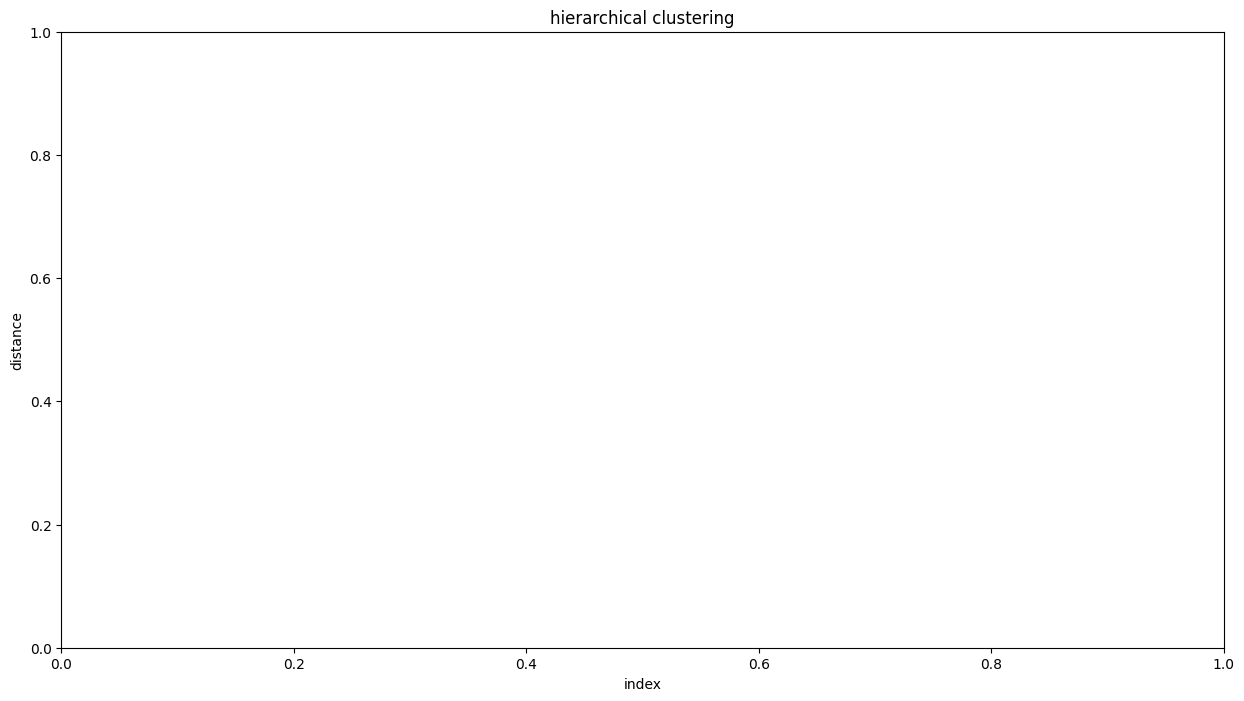

In [39]:
plt.figure(figsize=(15,8));plt.title("hierarchical clustering"), plt.xlabel("index"), plt.ylabel("distance")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [70.0, 70.0, 102.5, 102.5],
  [125.0, 125.0, 135.0, 135.0],
  [86.25, 86.25, 130.0, 130.0],
  [45.0, 45.0, 108.125, 108.125],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [170.0, 170.0, 193.75, 193.75],
  [150.0, 150.0, 181.875, 181.875],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [165.9375, 165.9375, 232.5, 232.5],
  [76.5625, 76.5625, 199.21875, 199.21875],
  [20.0, 20.0, 137.890625, 137.890625]],
 'dcoord': [[0.0,
   np.float64(0.3945634782634699),
   np.float64(0.3945634782634699),
   0.0],
  [0.0, np.float64(0.5567904393016361), np.float64(0.5567904393016361), 0.0],
  [np.float64(0.3945634782634699),
   np.f

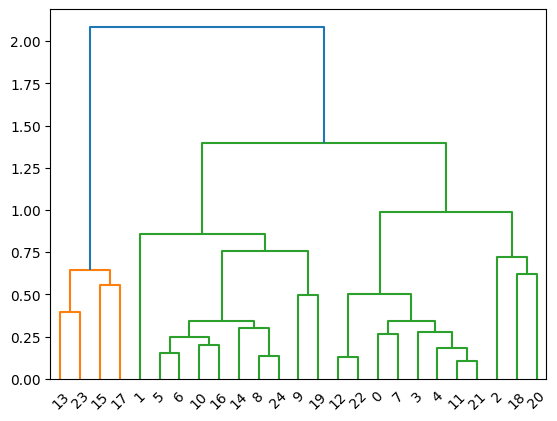

In [49]:
dendrogram(z)

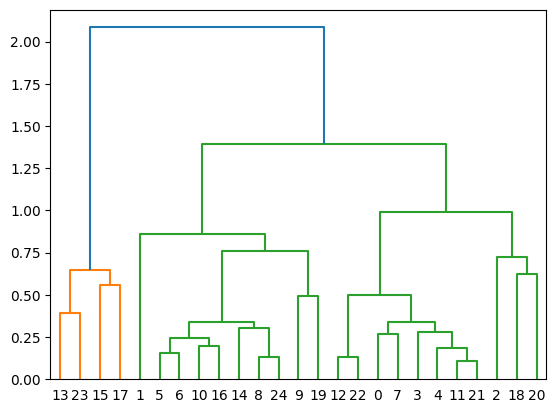

In [53]:
dendrogram(z,
           leaf_rotation=0, 
           leaf_font_size =10
          )
plt.show()

In [54]:
from sklearn.cluster import AgglomerativeClustering

In [57]:
h_complete = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(df_norm)

In [58]:
h_complete.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2])

In [60]:
#convert these labels into series like columns
cluster_labels = pd.Series(h_complete.labels_)

In [62]:
univ["clusters"]=cluster_labels

In [63]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusters
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [64]:
univ1 = univ.iloc[:, [7,0,1,2,3,4,5,6]]

In [65]:
univ1.head()

,clusters,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,Brown,1310,89,22,13,22704,94
1,2,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,0,Columbia,1310,76,24,12,31510,88
4,0,Cornell,1280,83,33,13,21864,90


In [66]:
#Aggregate mean of each cluster
univ1.iloc[:,2:].groupby(univ1.clusters).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusters,,,,,,
0,1260.0,78.818182,39.181818,12.818182,21446.909091,87.636364
1,1061.5,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1355.5,89.000000,26.900000,10.000000,40897.200000,91.700000


In [67]:
univ1.iloc[:,2:].groupby(univ1.clusters).std()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusters,,,,,,
0,37.549967,9.672830,14.351433,2.272364,6160.904616,6.903227
1,37.890192,8.616844,14.899664,4.193249,1417.252036,5.737305
2,41.663333,8.055364,12.050357,2.309401,11445.993562,5.165054


In [70]:
univ1.to_csv("university_cluster_report.csv", encoding = "utf-8")

In [71]:
import os

In [72]:
os.getcwd()

'C:\\Users\\priya'